# (a) question text part

In [4]:
from question_preprocess import QuestionPreprocessor

In [1]:
import collections
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
Qproc = QuestionPreprocessor()

## load dataset, tokenize them and build vocabulary

In [3]:
test_data, _ = Qproc.load_data_csv(file_name="test.csv")

In [4]:
train_data, train_label = Qproc.load_data_csv(file_name="train.csv")

 In training data:
 num of Label 0: 1225312 
 num of Label 1: 80810 
 Toxic percentage: 6.187017751787352 %


In [5]:
train_token = Qproc.tokenizer(train_data)

 Time for tokenizing all questions is 170.78914308547974 (s)


In [6]:
test_token = Qproc.tokenizer(test_data)

 Time for tokenizing all questions is 7.861229181289673 (s)


In [8]:
vocab, words = Qproc.build_vocabulary(test_token+train_token, freq_cutoff=5)

 built vocabulary with 52307 words


## save processed data

In [9]:
Qproc.dump_data_pkl(vocab,file_name="vocab.pkl")

 file vocab.pkl dumped to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/vocab.pkl


In [10]:
Qproc.dump_data_pkl(test_token, file_name="test_token.pkl")

 file test_token.pkl dumped to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/test_token.pkl


In [11]:
Qproc.dump_data_pkl(train_token, file_name="train_token.pkl")

 file train_token.pkl dumped to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/train_token.pkl


In [12]:
Qproc.dump_data_pkl(train_label, file_name="train_label.pkl")

 file train_label.pkl dumped to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/train_label.pkl


## analyze ditribution of sequence length (unit in word) in the datasets

In [13]:
seq_len_dist = Qproc.seq_len_dist(train_token+test_token)

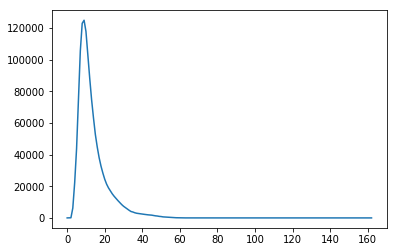

In [14]:
plt.plot(seq_len_dist)

## one can also load from existing pkl files as shown below

In [7]:
train_token = Qproc.load_data_pkl(file_name="train_token.pkl")
train_label = Qproc.load_data_pkl(file_name="train_label.pkl")
test_token = Qproc.load_data_pkl(file_name="test_token.pkl")
vocab = Qproc.load_data_pkl(file_name="vocab.pkl")

## build & save train and test matrix for NN models (input of embedding layer)

In [8]:
train_mat = Qproc.build_data_mat(vocab, train_token, train_label)

In [10]:
test_mat = Qproc.build_data_mat(vocab, test_token)

In [9]:
train_mat[123034]
test_mat[100]

array([21564, 51513, 51964, 12457, 52307, 39036, 22586, 15808,   307,
       52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308,
       52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308,
       52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308,
       52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308,
       52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308, 52308,
       52308, 52308, 52308, 52308, 52308, 52308,     0])

In [12]:
Qproc.dump_data_pkl(train_mat, file_name="train_mat.pkl")
Qproc.dump_data_pkl(test_mat, file_name="test_mat.pkl")

 file train_mat.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/train_mat.pkl
 file test_mat.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/test_mat.pkl


# (b) embedding part

In [1]:
import torch
from embedding_preprocess import EmbeddingPreprocessor

In [2]:
Eproc = EmbeddingPreprocessor()

## load vocabulary and embedding

In [3]:
vocab = Eproc.load_vocabulary_pkl(file_name="vocab.pkl")

In [4]:
glove = Eproc.load_embedding(file_name="glove.840B.300d.txt")

## build pretrained_weight matrix for embedding layer

In [5]:
pretrained_weight = Eproc.get_pretrained_weight(vocab, glove)

In [7]:
print(len(vocab), len(glove), pretrained_weight.shape)

52307 2195895 (52309, 300)


## save pretrained_weight and release memory (glove ~ 5G)

In [8]:
Eproc.dump_weight_mat_pkl(pretrained_weight,file_name="pretrained_weight.pkl")

 file pretrained_weight.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/pretrained_weight.pkl


In [9]:
Eproc.release_emb_mem(glove)


clearing embedding memory...
